<a href="https://colab.research.google.com/github/danny4159/Classification-of-spinal-cord-tumors/blob/master/Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras-resnet

  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20487 sha256=5b374a269126efbeab504f5fa5765a4fca24f9ea5bb7bdf53c5ccf67a74b0124
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-resnet


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
import keras
import keras_resnet.models
from keras.optimizers import Adam

In [ ]:
from google.colab import files
uploaded_train = files.upload()

Saving train.csv to train.csv


In [ ]:
from google.colab import files
uploaded_test = files.upload()

Saving test.csv to test.csv


In [ ]:
import io
train = pd.read_csv(io.BytesIO(uploaded_train['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded_test['test.csv']))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


3    105
1    105
0    103
2     83
Name: label, dtype: int64

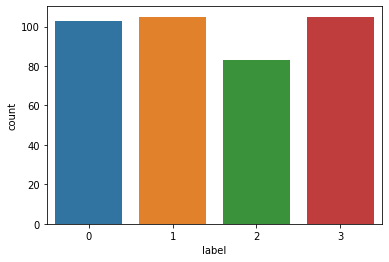

In [ ]:
Y_train = train["label"]

# 'label' column 을 drop
X_train = train.drop(labels = ["label"],axis = 1) 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [ ]:
X_train = X_train / 255.0
test = test / 255.0

X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [ ]:
Y_train = to_categorical(Y_train, num_classes = 4)

In [ ]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, 
                                                  test_size = 0.1, 
                                                  random_state=random_seed)

In [ ]:
shape, classes = (28, 28, 1), 4
x = keras.layers.Input(shape)
# model = keras_resnet.models.ResNet50(x, classes=classes)
# model = keras_resnet.models.ResNet152(x, classes=classes)
model = keras_resnet.models.ResNet200(x, classes=classes) ## 50, ... , 200 등 다양하게 설정할 수 있어.
# model.summary()
model.compile(optimizer = Adam(0.001), loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, Y_train, epochs=30, validation_data=(X_val,Y_val))

Epoch 1/30
12/12 [==============================] - 4s 308ms/step - loss: 2.0139 - accuracy: 0.3904 - val_loss: 71264976.0000 - val_accuracy: 0.2750
Epoch 2/30
12/12 [==============================] - 1s 95ms/step - loss: 1.3724 - accuracy: 0.4213 - val_loss: 16374490.0000 - val_accuracy: 0.1750
Epoch 3/30
12/12 [==============================] - 1s 93ms/step - loss: 1.0392 - accuracy: 0.4916 - val_loss: 996286.1250 - val_accuracy: 0.2750
Epoch 4/30
12/12 [==============================] - 1s 93ms/step - loss: 1.1577 - accuracy: 0.5000 - val_loss: 26267.2539 - val_accuracy: 0.2750
Epoch 5/30
12/12 [==============================] - 1s 94ms/step - loss: 1.1574 - accuracy: 0.4607 - val_loss: 794.4457 - val_accuracy: 0.2750
Epoch 6/30
12/12 [==============================] - 1s 94ms/step - loss: 1.1371 - accuracy: 0.4831 - val_loss: 47.1662 - val_accuracy: 0.1750
Epoch 7/30
12/12 [==============================] - 1s 94ms/step - loss: 0.9734 - accuracy: 0.5309 - val_loss: 5.6922 - val_acc